In [1]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in data and display fist 5 rows
df = pd.read_csv('TIME SERIES + TRIPADVISORS INDEX + TOPIC AND SENTIMENT INTENSITY + ECONOMIC INDEX - DATA COMPOSITION 4 (Fixed Set Test).csv')
df.head(5)

,Month,Tourist Arrival,Number of Posts,Number of Comments,NegativityQDAP,PositivityQDAP,TOPIC 1,TOPIC 2,TOPIC 3,TOPIC 4,TOPIC 5,TOPIC 6,TOPIC 7,TOPIC 8,TOPIC 9,TOPIC 10,CCI,PMI,REERI,Class
0,01/01/2008,399556,403,3049,0.181818,0.090909,0.008715,0.010894,0.889993,0.011228,0.010641,0.001710,0.014932,0.027566,0.014081,0.010241,98.4,53.3,109,Train
1,01/02/2008,411032,357,3211,0.000000,0.090909,0.009085,0.010974,0.007221,0.006829,0.006410,0.005451,0.011673,0.014948,0.913561,0.013848,90.8,53.0,108,Train
2,01/03/2008,414332,344,3153,0.142857,0.000000,0.008164,0.005849,0.006917,0.009097,0.007196,0.001611,0.007281,0.005533,0.014198,0.934153,89.5,53.4,106,Train
3,01/04/2008,395900,338,3184,0.214286,0.071429,0.007528,0.013789,0.005867,0.911020,0.012191,0.001259,0.014063,0.019446,0.006807,0.008030,82.6,56.4,106,Train
4,01/05/2008,366387,369,2964,0.000000,0.100000,0.008862,0.007257,0.010529,0.011619,0.014288,0.001458,0.015968,0.915464,0.010944,0.003609,79.8,57.2,106,Train


In [3]:
import datetime
df['Month'] = pd.to_datetime(df['Month'])
df['Month'] = df['Month'].dt.strftime('%d.%m.%Y')
df['Month'] = pd.DatetimeIndex(df['Month']).dayofyear

In [4]:
x=df.drop('Tourist Arrival', axis=1)
y=df['Tourist Arrival']

In [5]:
train = df[df["Class"] == "Train"]
validation = df[df["Class"] == "Validation"]
test = df[df["Class"] == "Test"]
print(train.shape)
print(validation.shape)
print(test.shape)

(133, 20)
(12, 20)
(41, 20)


In [6]:
train = train.drop(['Class'], axis=1)
validation = validation.drop(['Class'], axis=1)
test = test.drop(['Class'], axis=1)

In [7]:
target_column_train = ['Tourist Arrival']
predictors_train = list(set(list(train.columns))-set(target_column_train))

x_train = train[predictors_train].values
y_train = train[target_column_train].values


print(x_train.shape)
print(y_train.shape)

(133, 18)
(133, 1)


In [8]:
target_column_validation = ['Tourist Arrival'] 
predictors_validation = list(set(list(validation.columns))-set(target_column_validation))

x_validation = validation[predictors_validation].values
y_validation = validation[target_column_validation].values

print(x_validation.shape)
print(y_validation.shape)

(12, 18)
(12, 1)


In [9]:
target_column_test = ['Tourist Arrival'] 
predictors_test = list(set(list(test.columns))-set(target_column_test))

x_test = test[predictors_test].values
y_test = test[target_column_test].values

print(x_test.shape)
print(y_test.shape)

(41, 18)
(41, 1)


In [10]:
params = {'solver': ['lbfgs', 'sgd', 'adam'],
          'hidden_layer_sizes': [10,20,30,40,50],
          'learning_rate': ['constant', 'invscaling', 'adaptive'],
          'shuffle': [True, False],
          'activation': ['identity', 'logistic', 'tanh', 'relu']}

In [11]:
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(solver='lbfgs',
                  hidden_layer_sizes=20,
                  max_iter=10000,
                  learning_rate='constant',
                  shuffle=False,
                  random_state=9876,
                  activation='relu')
nn.fit(x_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(hidden_layer_sizes=20, max_iter=10000, random_state=9876,
             shuffle=False, solver='lbfgs')

In [12]:
from sklearn.model_selection import GridSearchCV
gs=GridSearchCV(estimator=nn, param_grid=params, cv=10)

In [ ]:
gs=gs.fit(x_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y 

In [ ]:
best_params=gs.best_params_

In [12]:
from math import sqrt
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

In [13]:
y_pred=nn.predict(x_test)
print(y_pred)

[ 7.42307102e+05  8.44348546e+05  8.47994553e+05  7.30492620e+05
  9.34847659e+05  9.09705221e+05  9.63616086e+05  1.04134651e+06
  9.11575950e+05  1.06398016e+06  6.28105974e+05  3.18322361e+05
 -1.45383715e+04  2.57031481e+03 -1.28500361e+02 -4.56892737e+00
 -2.24686234e+00 -6.70600167e-02  4.82768446e+00  2.04443645e+00
  4.85407774e+00  1.35827296e+01  1.57087190e+01 -3.26454889e+04
 -9.30854008e+03  2.91353550e+04  6.57456773e+04  9.56353016e+04
  1.17171825e+05  1.59173665e+05  1.96861700e+05  2.12215301e+05
  2.63703047e+05  2.97080811e+05  2.89346288e+05  4.34225935e+05
  3.82236542e+05  4.26555383e+05  2.74079171e+05  1.70856345e+05
  1.37958261e+05]


In [14]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", RMSE)

Root Mean Squared Error: 437444.98165870423


In [15]:
MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 312501.7533146047


In [16]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", MAPE)

Mean Absolute Percentage Error: 1.895443786483839e+18


In [17]:
def SMAPE(y_test,y_pred):
    return 100/len(y_test) * np.sum(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred)))
result = SMAPE(y_test,y_pred)
print("SMAPE :", result)

SMAPE : 6175.1294632443405


In [18]:
def RMSPE(y_test, y_pred):
    return np.sqrt(np.nanmean(np.square(((y_test - y_pred) / y_test))))*100
result1 = RMSPE(y_test,y_pred)
print("RMSPE :", result1)

RMSPE : inf


/var/folders/w4/3f8pkphx2j78qktgvt5lpdvw0000gn/T/ipykernel_3645/2542154612.py:2: RuntimeWarning: divide by zero encountered in divide
  return np.sqrt(np.nanmean(np.square(((y_test - y_pred) / y_test))))*100


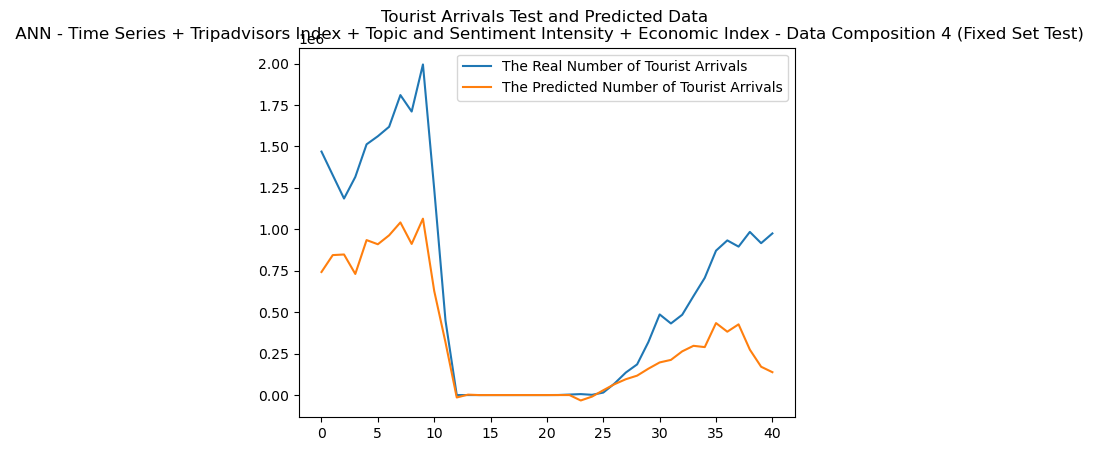

In [19]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="The Real Number of Tourist Arrivals")
plt.plot(x_ax, y_pred, label="The Predicted Number of Tourist Arrivals")
plt.title("Tourist Arrivals Test and Predicted Data \n ANN - Time Series + Tripadvisors Index + Topic and Sentiment Intensity + Economic Index - Data Composition 4 (Fixed Set Test)")
plt.legend()
plt.show()